## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/Study/CS839/Graph\ from\ image/Relationship/Results_relationship/dataset/

/content/gdrive/MyDrive/Study/CS839/Graph from image/Relationship/Results_relationship/dataset/image_level


In [ ]:
import json
import pandas as pd
import spacy
import numpy as np
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # just keep tagger for lemmatization


In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data

,Unnamed: 0,Image Height,Image_Width,subject_name,subject_x,subject_y,subject_width,subject_height,object_name,object_x,object_y,object_width,object_height,Image_ID,relationship
0,0,600,800,shade,256.0,434.0,274,192,sidewalk,439.0,453.0,722,290,1,on
1,1,600,800,man,268.0,380.0,60,262,shoe,412.0,499.0,48,28,1,wear
2,2,600,800,car,516.0,364.0,74,98,headlight,525.5,373.5,23,15,1,have
3,3,600,800,sign,162.0,104.0,88,182,building,110.0,270.0,218,536,1,on
4,4,600,800,tree trunk,665.5,397.5,87,327,sidewalk,438.0,464.0,722,266,1,on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175086,175086,500,333,bird,265.5,261.0,29,100,branch,264.0,266.5,20,31,2372684,on
175087,175087,500,333,bird,265.5,261.0,29,100,limb,255.5,232.0,131,262,2372684,on
175088,175088,500,333,bird,139.0,411.5,56,73,branch,239.5,228.0,25,88,2372684,on
175089,175089,500,333,tail,116.0,436.0,40,46,parrot,143.5,414.0,79,112,2372684,of


## Data Preprocessing

In [ ]:
#Replace similar predicates

synonyms = {
    'on': ['be on', 'on top of', 'over', 'on a' , 'sit in', 'sit on', 'lay on'],
    'in': ['in a', 'inside', 'inside of', 'be in'],
    'of': ['of a'],
    'wear': ['wear a'],
    'have': ['have a', 'have an'],
    'beside': ['next to'],
    'with': ['with a'],
    'beside': ['on side of', 'by'],
    'near': ['next to', 'around', 'beside', 'along'],
    'in front of':['in front', 'on front of'],
    'below': ['under'],
    'hold': ['carry', 'holds'],
    'stand': ['stand in', 'stand on']
        

}

for key in synonyms:
  for i in synonyms[key]:
    data['relationship'] = data['relationship'].replace(i, key)


#Replace similar predicates

synonyms_2 = {
    'person': ['man', 'woman', 'child', 'boy', 'girl'],
   

}

for key in synonyms_2:
  for i in synonyms_2[key]:
    data['subject_name'] = data['subject_name'].replace(i, key)
    data['object_name'] = data['object_name'].replace(i, key)
    




In [ ]:
# Check #unique values for 'objects' and 'relationships'

print('Before data cleaning: ')
print('#relationships = ', len(data['relationship'].unique()))

objects = data.subject_name.append(data.object_name)
print('#objects = ', len(objects.unique()))

Before data cleaning: 
#relationships =  17847
#objects =  33403


In [ ]:


# Remove rows which contain rarely occuring features
# Run this section twice. Otherwise low-frequence objects are still there. This happens because of sequential execution

min_instances = 850


# object should occur at least 100 times
data = data[data['subject_name'].map(data['subject_name'].value_counts()) > min_instances]

# object should occur at least 100 times
data = data[data['object_name'].map(data['object_name'].value_counts()) > min_instances]

# relationship should occur at least 100 times
data = data[data['relationship'].map(data['relationship'].value_counts()) > min_instances]

# Check #unique values for 'objects' and 'relationships'

print('After data cleaning: ')
print('#relationships = ', len(data['relationship'].unique()))

objects = data.subject_name.append(data.object_name)
print('#objects = ', len(objects.unique()))

In [ ]:
print(data.relationship.value_counts())
print(data.subject_name.value_counts())
print(data.object_name.value_counts())


In [ ]:
#y = data['relationship']

In [ ]:
data

,Unnamed: 0,Image Height,Image_Width,subject_name,subject_x,subject_y,subject_width,subject_height,object_name,object_x,object_y,object_width,object_height,Image_ID,relationship
1,1,600,800,person,268.0,380.0,60,262,shoe,412.0,499.0,48,28,1,wear
3,3,600,800,sign,162.0,104.0,88,182,building,110.0,270.0,218,536,1,on
5,5,600,800,person,268.0,380.0,60,262,shirt,270.5,339.5,59,101,1,have
6,6,600,800,sidewalk,438.0,464.0,722,266,street,578.0,399.5,440,233,1,near
7,7,600,800,car,753.5,429.0,91,174,back,754.5,424.0,67,170,1,have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175084,175084,500,333,bird,233.5,190.0,39,72,branch,160.0,439.5,44,55,2372684,on
175085,175085,500,333,bird,233.5,190.0,39,72,branch,204.5,342.5,137,313,2372684,on
175086,175086,500,333,bird,265.5,261.0,29,100,branch,264.0,266.5,20,31,2372684,on
175088,175088,500,333,bird,139.0,411.5,56,73,branch,239.5,228.0,25,88,2372684,on


In [ ]:
# Data Preprocessing
X = pd.DataFrame()
X['rel_x'] = (data['subject_x'] - data['object_x'])/data['Image_Width']
X['rel_y'] = (data['subject_y'] - data['object_y'])/data['Image Height']
X['rel_w'] = np.log2(data['subject_width']/data['object_width'])
X['rel_h'] = np.log2(data['subject_height']/data['object_height'])
X['subject_name'] = data['subject_name']
X['object_name'] = data['object_name']

y = data['relationship']

## Exploratory Data Analysis

Text(0.5, 0, 'Relationship')

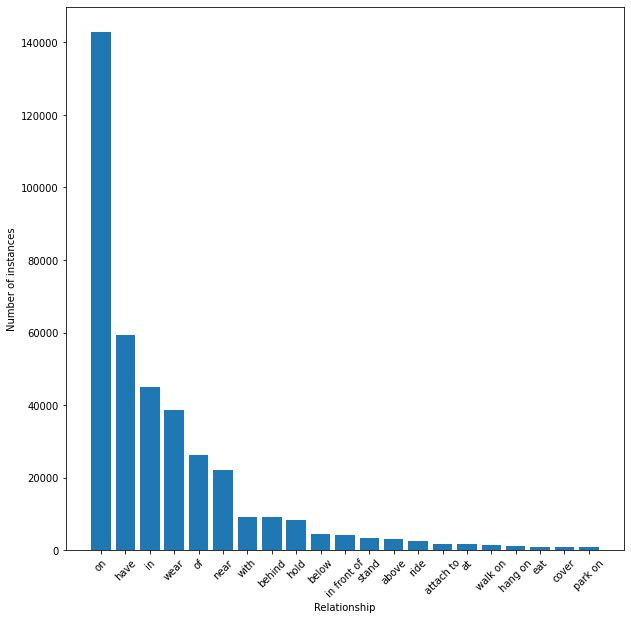

In [ ]:
hist = y.value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
plt.bar(hist.index, hist)
plt.ylabel('Number of instances')
plt.xlabel('Relationship')

In [ ]:
# Normalization - Scaling width and height columns

min_w = X['rel_w'].min()
max_w =  X['rel_w'].max()

X['rel_w'] = (((X['rel_w'] - min_w) / (max_w - min_w)) * 2) - 1

min_h = X['rel_h'].min()
max_h=  X['rel_h'].max()

X['rel_h'] = (((X['rel_h'] - min_h) / (max_h - min_h)) * 2) - 1

In [ ]:
# One-hot encoding
categorical_cols = ['subject_name', 'object_name']
X = pd.get_dummies(X, columns = categorical_cols)

## Remove data imbalance

In [ ]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X, y = rus.fit_resample(X, y)

<BarContainer object of 21 artists>

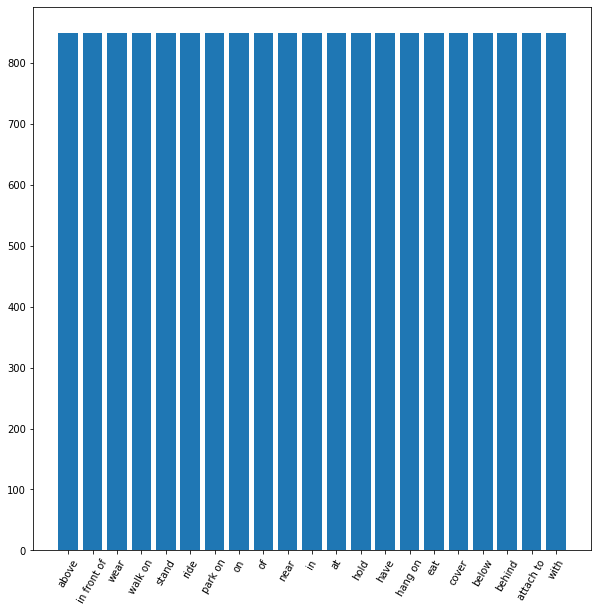

In [ ]:
hist = y.value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.xticks(rotation=60)
plt.bar(hist.index, hist)

In [ ]:
len(X), len(y)

(17829, 17829)

## Neural network training

In [ ]:
y_one_hot = pd.get_dummies(y)


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3,random_state=109) # 70% training and 30% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3,random_state=109) # 70% val and 30% train


In [ ]:
len(X.columns)

326

In [ ]:


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
#from tf.keras import losses
import tensorflow as tf

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(100, input_dim = len(X.columns) , activation='relu'))
  model.add(Dense(len(y_train.columns), activation='sigmoid'))
  # Compile model
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])
  return model
	
 

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model = baseline_model()
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
    #callbacks=[es]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               32700     
                                                                 
 dense_3 (Dense)             (None, 21)                2121      
                                                                 
Total params: 34,821
Trainable params: 34,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("model.h5")

## Evaluation on test data

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

In [ ]:
import numpy as np
# predict probabilities for test set
yhat_probs = model.predict(X_test)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs[0])


In [ ]:
y_pred = []
for i in yhat_probs:
  y_pred.append(np.argmax(i))

In [ ]:
y_one_hot_test = pd.get_dummies(y_test)

In [ ]:
y_t = []
for i in range(len(y_one_hot_test)):
  y_t.append(np.argmax(y_test.iloc[i]))

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_t, y_pred))
print("Precision: ", precision_score(y_t, y_pred, average="macro"))
print("Recall: ",recall_score(y_t, y_pred, average="macro"))
print("F1 score: ",f1_score(y_t, y_pred, average="macro"))
